In [1]:
%matplotlib inline
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from  sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('../data/AdSmartABdata.csv')

In [3]:
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


## Feature engineering

In [4]:
for col in data.columns:
  print(col,':', data[col].nunique(), 'labels')

auction_id : 8077 labels
experiment : 2 labels
date : 8 labels
hour : 24 labels
device_make : 270 labels
platform_os : 3 labels
browser : 15 labels
yes : 2 labels
no : 2 labels


In [5]:
#Drop auction_id since it is unique to every data and no prediction value
data.drop('auction_id', axis=1, inplace=True)

In [6]:
#Merge yes and no columns into converted(0 for no/1 for yes)
a =pd.DataFrame(data[(data['yes']==1)]) 

b =pd.DataFrame(data[(data['no']==1)])

b['no']=0
df = pd.concat([a, b]).sort_index()
df. drop(['no'], axis=1, inplace=True)
df.rename(columns = {'yes':'converted'}, inplace = True) 
df.head()

,experiment,date,hour,device_make,platform_os,browser,converted
2,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
16,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
20,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
23,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
27,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0


In [7]:
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in all columns. 
df['experiment']= label_encoder.fit_transform(df['experiment'])
df['date']= label_encoder.fit_transform(df['date'])
df['device_make']= label_encoder.fit_transform(df['device_make'])
df['browser']= label_encoder.fit_transform(df['browser'])
df.head()

,experiment,date,hour,device_make,platform_os,browser,converted
2,1,2,2,4,6,2,0
16,1,1,16,13,6,1,1
20,1,3,8,13,6,1,0
23,0,5,4,43,6,4,1
27,0,0,15,13,6,1,0


In [8]:
#Number of unique values for aech column
for col in df.columns:
  print(col,':', df[col].nunique(), 'labels')

experiment : 2 labels
date : 8 labels
hour : 24 labels
device_make : 115 labels
platform_os : 2 labels
browser : 8 labels
converted : 2 labels


In [9]:
#Drop device_make
data.drop('device_make', axis=1, inplace=True)

In [10]:
#standardize the data so that exaggerated values don't affect our model(logistic regression)
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
df[:1243] = scaling.fit_transform(df[:1243])

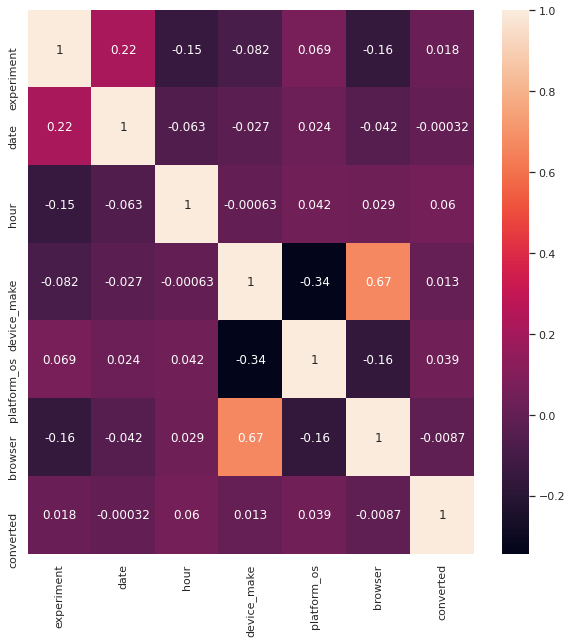

In [11]:
#correlation among the features
corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(10,10))
#plot heat map
corr_p= sns.heatmap(df[top_corr_features].corr(), annot= True)

In [28]:
train_size=0.7
   
train,test= train_test_split(df,train_size=0.7)


test_size=0.3

test, valid = train_test_split(test,test_size=0.3 )

print(train.shape,test.shape,valid.shape)  

(870, 7) (261, 7) (112, 7)


In [26]:
#spliting data in to train validation and test set excluding platform_os coloumn
train_x=train.drop(['platform_os'],axis=1)
test_x=test.drop(['platform_os'], axis=1)
val_x=valid.drop(['platform_os'],axis=1)
print(train_x.shape,test_x.shape,val_x.shape)

(870, 6) (261, 6) (112, 6)


In [29]:
#spliting data in to train validation and test set excluding browser coloumn
train_y=train.drop(['browser'], axis=1)
test_y=test.drop(['browser'], axis=1)
val_y=valid.drop(['browser'],axis=1)
print(train_y.shape,test_y.shape,val_y.shape)

(870, 6) (261, 6) (112, 6)


In [30]:
#Import modeling algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [31]:
#import cross_validation library
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5)

In [34]:
#train logistic regression model
log_model = LogisticRegression()
log_model.fit(train_x)
print(cross_val_score(log_model, x_train,cv=k_fold))

TypeError: fit() missing 1 required positional argument: 'y'